In [651]:

import numpy as np
import pandas as pd

import re
import string
import os

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [652]:
import pandas as pd
df= pd.read_csv('Dataset Text.csv')
df

,Kalimat,Label,Text
0,R1,supports,competition can effectively promote the develo...
1,R2,attacks,competition can effectively promote the develo...
2,R3,supports,what we acquired from team work is not only ho...
3,R4,supports,through cooperation children can learn about i...
4,R5,supports,all of these skills help them to get on well w...
...,...,...,...
1034,R19,attacks,the use of cctv cameras does cause controversy...
1035,R20,supports,this is chiefly to shield oneself from being h...
1036,R21,attacks,privacies are lost with the use of these camer...
1037,R22,attacks,safety should be put first in order to be safe...


In [653]:
import string

def data_cleaning(raw_data):
    raw_data = raw_data.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = raw_data.lower().split()
    stops = set(stopwords.words("english"))
    useful_words = [w for w in words if not w in stops]
    return( " ".join(useful_words))

df['Text']=df['Text'].apply(data_cleaning)

In [654]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

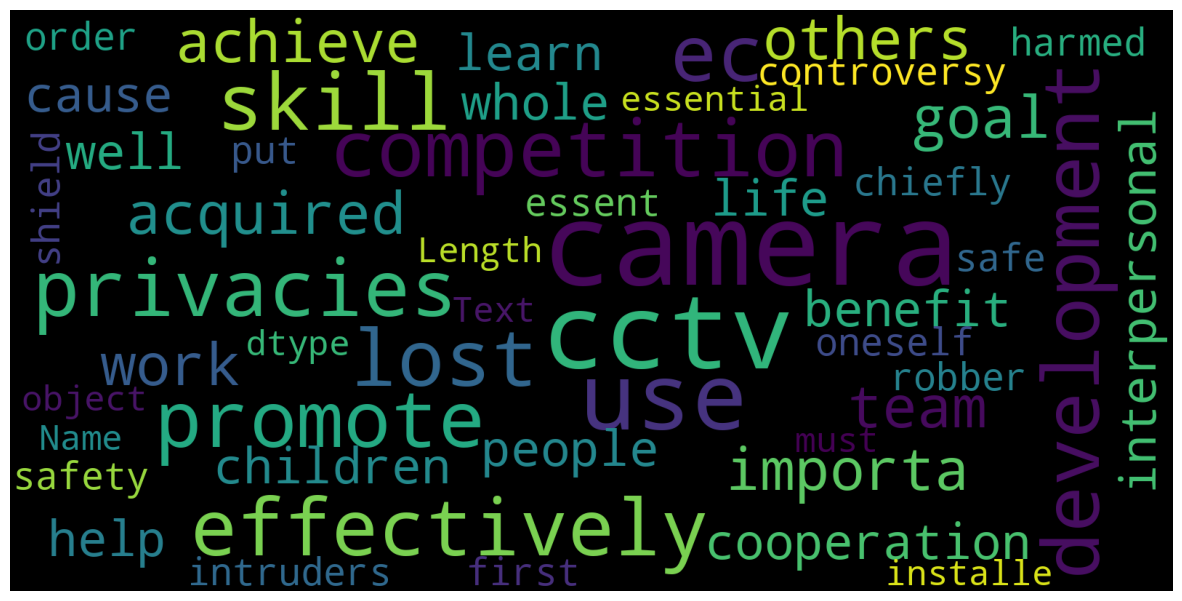

In [655]:
def generate_wordcloud(data, title = None):
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=4).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

generate_wordcloud(df['Text'])

In [656]:
print(df.isnull().sum())

Kalimat    0
Label      0
Text       0
dtype: int64


Text(0.5, 1.0, 'Label Data Distribution')

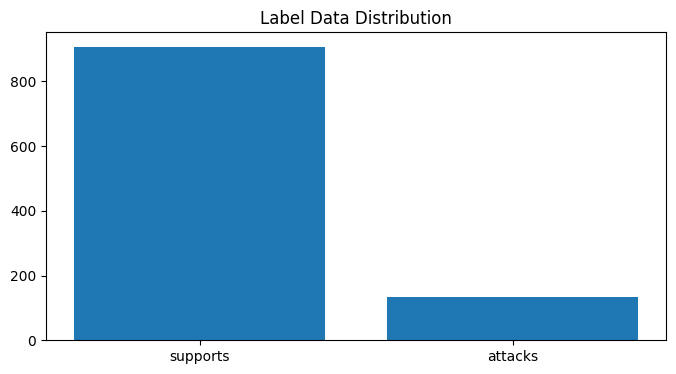

In [657]:
import matplotlib.pyplot as plt

val_count = df.Label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title('Label Data Distribution')

In [658]:
from sklearn.preprocessing import LabelEncoder


df.drop(columns=['Kalimat'], inplace=True)

df['Label'] = df['Label'].apply(lambda x: 1 if x == 'supports' else 0)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
df

,Label,Text
0,1,competition effectively promote development ec...
1,0,competition effectively promote development ec...
2,1,acquired team work achieve goal others importa...
3,1,cooperation children learn interpersonal skill...
4,1,skills help get well people benefit whole life...
...,...,...
1034,0,use cctv cameras cause controversy cctv camera...
1035,1,chiefly shield oneself harmed intruders robber...
1036,0,privacies lost use cameras cctv cameras essent...
1037,0,safety put first order safe privacies lost use...


In [659]:
from nltk.corpus import stopwords

def data_cleaning(raw_data):
    raw_data = raw_data.translate(str.maketrans('', '', string.punctuation + string.digits))
    words = raw_data.lower().split()
    stops = set(stopwords.words("english"))
    useful_words = [w for w in words if not w in stops]
    return " ".join(useful_words)

df['Text'] = df['Text'].apply(data_cleaning)

In [660]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [661]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [662]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_wb= TfidfVectorizer()

X_tf = tf_wb.fit_transform(df['Text'])

In [663]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label'])


vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [664]:
max_length = 160

y = df["Label"].values
reviews = df["Text"]
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(reviews))
list_tokenized = tokenizer.texts_to_sequences(reviews)


In [665]:

# from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPool1D, Dense, Dropout, Input

# class ModelA():
#     def __new__(self):
#         max_length = 160

#         inp = Input(shape=(max_length,))
#         embed_size = 128
#         x = Embedding(max_features, embed_size)(inp)
#         x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
#         x = GlobalMaxPool1D()(x)
#         x = Dropout(0.2)(x)
#         x = Dense(50, activation="relu")(x)
#         x = Dropout(0.1)(x)
#         x = Dense(1, activation="sigmoid")(x)
#         model = Model(inputs=inp, outputs=x)
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#         return model

# class ModelB():
#     def __new__(self):
#         max_length = 160

#         inp = Input(shape=(max_length,))
#         embed_size = 128
#         x = Embedding(max_features, embed_size)(inp)
#         x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
#         x = GlobalMaxPool1D()(x)
#         x = Dropout(0.2)(x)
#         x = Dense(50, activation="relu")(x)
#         x = Dropout(0.2)(x)
#         x = Dense(1, activation="sigmoid")(x)
#         model = Model(inputs=inp, outputs=x)
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#         return model

# class ImprovedModelC():
#     def __new__(self, input_dim, max_length):
#         model = Sequential()
#         model.add(Embedding(input_dim=input_dim, output_dim=64, input_length=max_length))
#         model.add(LSTM(32, return_sequences=True))
#         model.add(GlobalMaxPool1D())
#         model.add(Dropout(0.5))
#         model.add(Dense(32, activation='relu'))
#         model.add(Dropout(0.5))
#         model.add(Dense(1, activation='sigmoid'))

#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#         return model



In [675]:
from tensorflow.keras.layers import Input, Embedding, LSTM, GlobalMaxPool1D, Dense, Dropout
from tensorflow.keras.models import Model, Sequential

class ModelA():
    def __new__(self, max_features, max_length):
        model = Sequential()
        model.add(Embedding(input_dim=max_features, output_dim=64, input_length=max_length))
        model.add(LSTM(32, return_sequences=True))
        model.add(GlobalMaxPool1D())
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

class ModelB():
    def __new__(self, max_features, max_length):
        model = Sequential()
        model.add(Embedding(input_dim=max_features, output_dim=64, input_length=max_length))
        model.add(LSTM(16))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

# class ModelC():
#     def __new__(self, max_features, max_length):
#         model = Sequential()
#         model.add(Embedding(input_dim=max_features, output_dim=64, input_length=max_length))
#         model.add(LSTM(32, return_sequences=True))
#         model.add(GlobalMaxPool1D())
#         model.add(Dropout(0.5))
#         model.add(Dense(32, activation='relu'))
#         model.add(Dropout(0.5))
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#         return model

max_features = 10000
max_length = 160

In [676]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import RandomOverSampler

X_padded = pad_sequences(list_tokenized, maxlen=max_length)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_padded, y)


In [677]:
def predict_func(model, X_test):

    X_test_processed = X_test.apply(data_cleaning)

    list_tokenized_test = tokenizer.texts_to_sequences(X_test_processed)
    X_test_padded = pad_sequences(list_tokenized_test, maxlen=max_length)

    predictions = model.predict(X_test_padded)

    y_pred = (predictions > 0.5).astype(int)

    return y_pred


y_pred = predict_func(model_instance, X_test)

model_instance.summary()


7/7 [==============================] - 0s 39ms/step
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 200)]             0         
                                                                 
 embedding_14 (Embedding)    (None, 200, 128)          768000    
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d_14 (G  (None, 60)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dropout_28 (Dropout)        (None, 60)                0         
                                                                 
 dense_28 (Dense)            (None, 50)                3050      
      

In [678]:
model = ModelA(max_features, max_length)
history_a = model.fit(X_resampled, y_resampled, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
23/23 [==============================] - 7s 194ms/step - loss: 0.6742 - accuracy: 0.6087 - val_loss: 0.9640 - val_accuracy: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 3s 123ms/step - loss: 0.6498 - accuracy: 0.6266 - val_loss: 0.8878 - val_accuracy: 0.0000e+00
Epoch 3/10
23/23 [==============================] - 3s 124ms/step - loss: 0.6071 - accuracy: 0.6570 - val_loss: 0.8066 - val_accuracy: 0.1543
Epoch 4/10
23/23 [==============================] - 3s 117ms/step - loss: 0.4964 - accuracy: 0.7888 - val_loss: 0.5764 - val_accuracy: 0.7466
Epoch 5/10
23/23 [==============================] - 4s 164ms/step - loss: 0.3136 - accuracy: 0.9137 - val_loss: 0.4268 - val_accuracy: 0.8264
Epoch 6/10
23/23 [==============================] - 3s 144ms/step - loss: 0.2005 - accuracy: 0.9538 - val_loss: 0.1740 - val_accuracy: 0.9780
Epoch 7/10
23/23 [==============================] - 3s 117ms/step - loss: 0.1360 - accuracy: 0.9786 - val_loss: 0.1214 - val_accuracy: 0.989

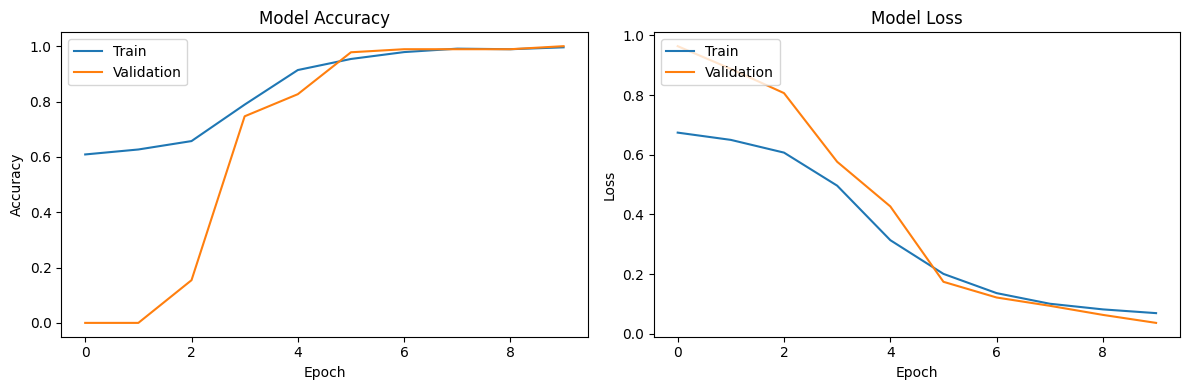

In [679]:
import matplotlib.pyplot as plt

def plot_metrics(history):

    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_metrics(history_a)

In [680]:
model = ModelB(max_features, max_length)
history_a = model.fit(X_resampled, y_resampled, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
23/23 [==============================] - 7s 135ms/step - loss: 0.6676 - accuracy: 0.6839 - val_loss: 0.7606 - val_accuracy: 0.1680
Epoch 2/10
23/23 [==============================] - 3s 145ms/step - loss: 0.5430 - accuracy: 0.7315 - val_loss: 0.7107 - val_accuracy: 0.5868
Epoch 3/10
23/23 [==============================] - 3s 128ms/step - loss: 0.3284 - accuracy: 0.9027 - val_loss: 0.4482 - val_accuracy: 0.8981
Epoch 4/10
23/23 [==============================] - 2s 106ms/step - loss: 0.2011 - accuracy: 0.9517 - val_loss: 0.3649 - val_accuracy: 0.9477
Epoch 5/10
23/23 [==============================] - 2s 107ms/step - loss: 0.1369 - accuracy: 0.9758 - val_loss: 0.2590 - val_accuracy: 0.9835
Epoch 6/10
23/23 [==============================] - 2s 104ms/step - loss: 0.1020 - accuracy: 0.9814 - val_loss: 0.2199 - val_accuracy: 0.9835
Epoch 7/10
23/23 [==============================] - 3s 122ms/step - loss: 0.0845 - accuracy: 0.9862 - val_loss: 0.1839 - val_accuracy: 0.9890
Epoch 

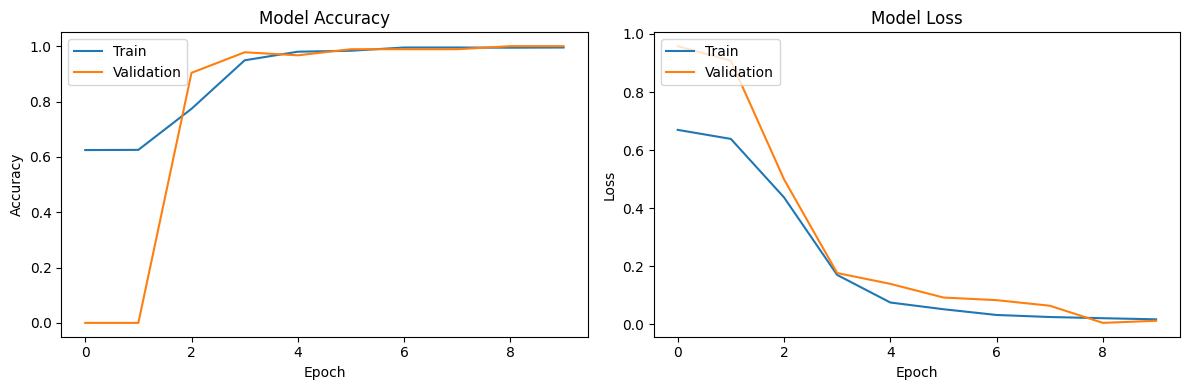

In [672]:
plot_metrics(history_b)

In [673]:
# model_c = ModelC(input_dim=len(tokenizer.word_index) + 1, max_length=max_length)
# history_c = model_c.fit(X_resampled, y_resampled, epochs=10, batch_size=64, validation_split=0.2)


In [674]:

# plot_metrics(history_b)